1. Посмотрим на качество прочтений файлов после fastqc:

1) Файл 1:

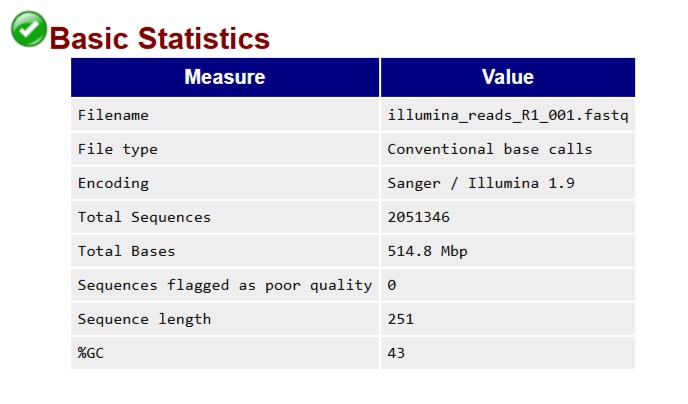

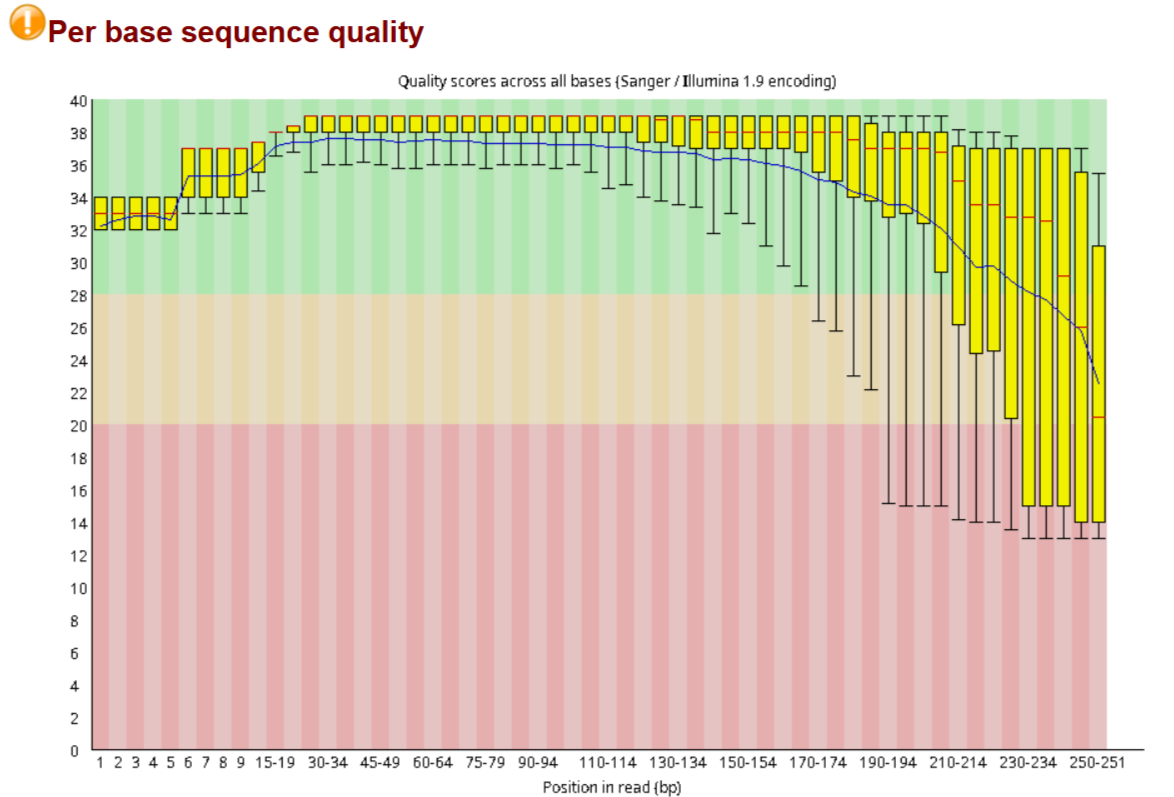

Качество прочтений по позициям хорошее, кроме позиций 210-250.

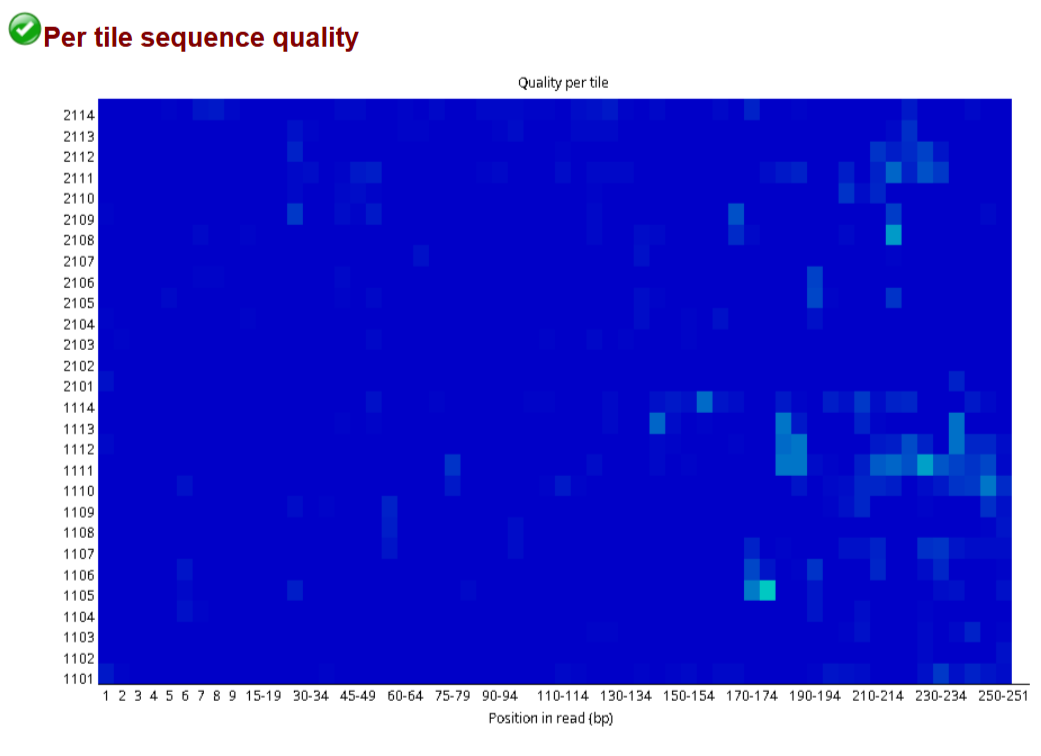

В целом все хорошо, но есть небольшие проблемы в позициях 210-250

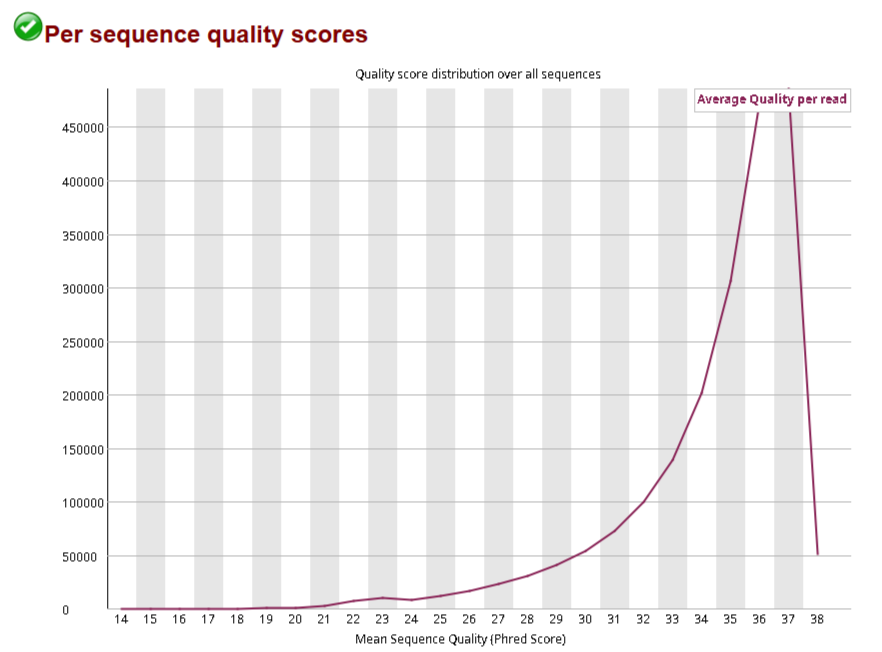

качество прочтений среднее 35-37 - это хорошо

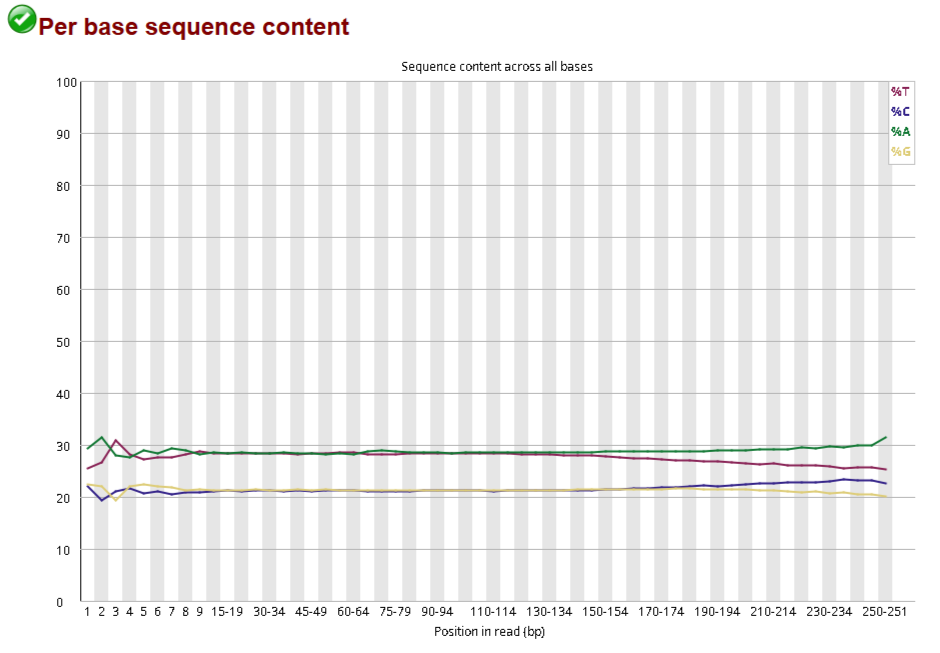

можно отрезать адаптеры

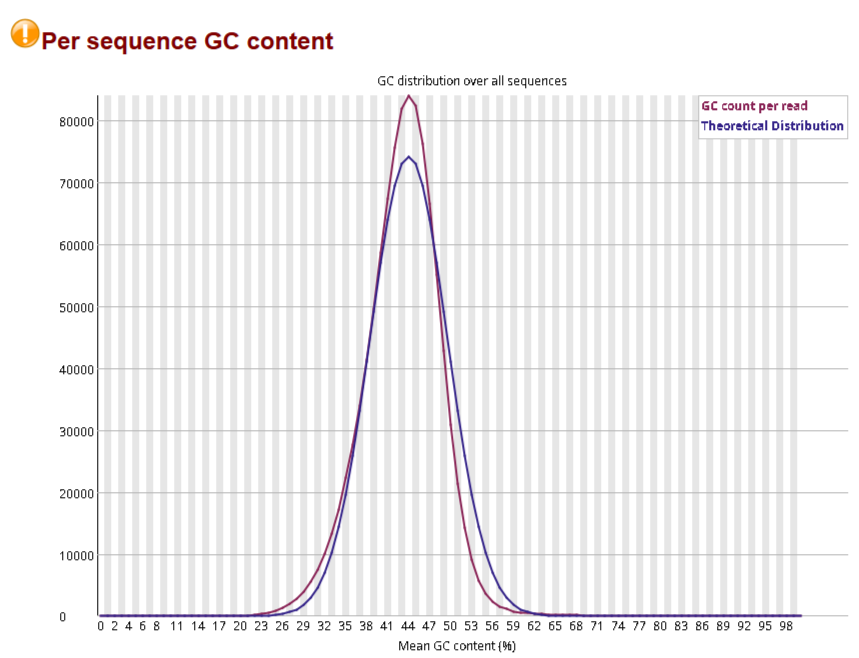

GC состав показывает, что есть загрязнения

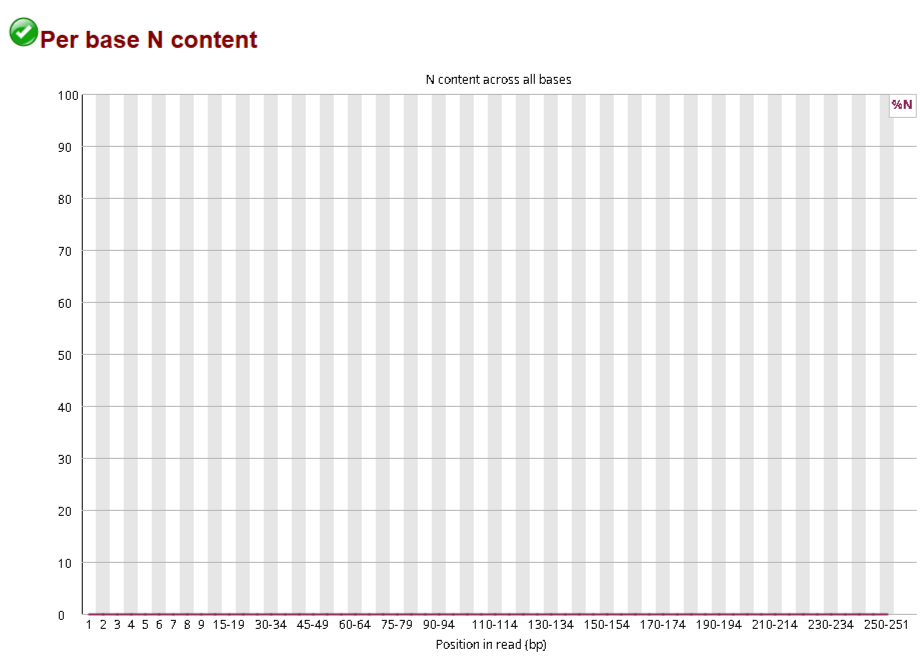
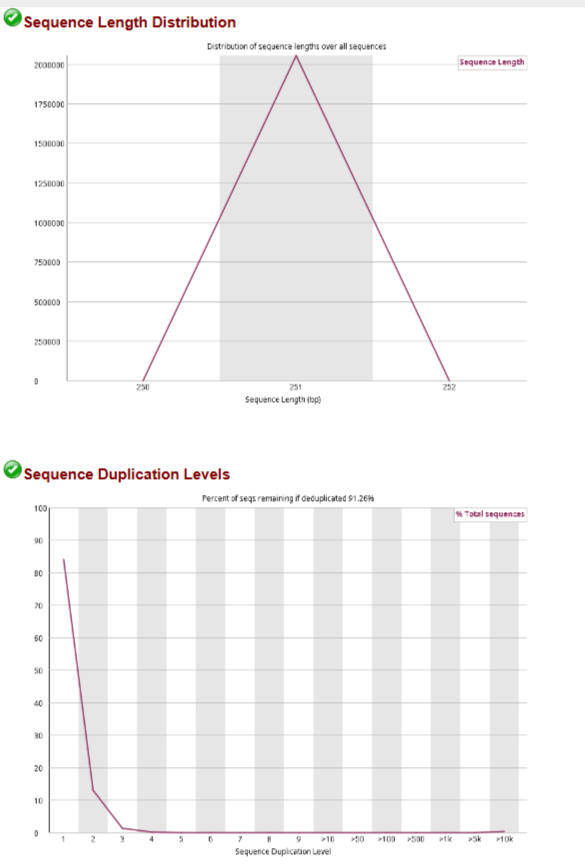

Sequece duplication level показывает, что в начале есть дуплицированные послежовательности.

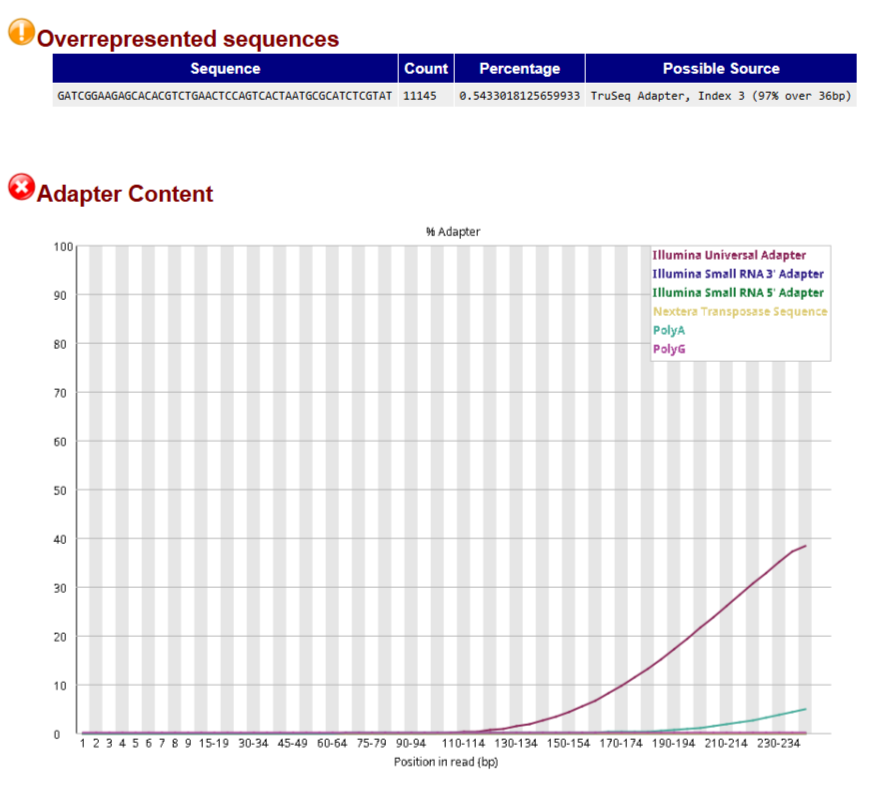

Найдена сверхпредставленная послежовательность и адаптеры, универсальные для иллюмины, также есть polyA

2) Анализ качества прочтений второго файла:

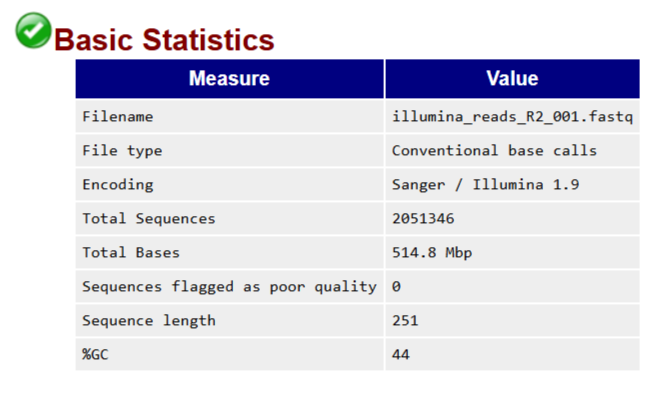

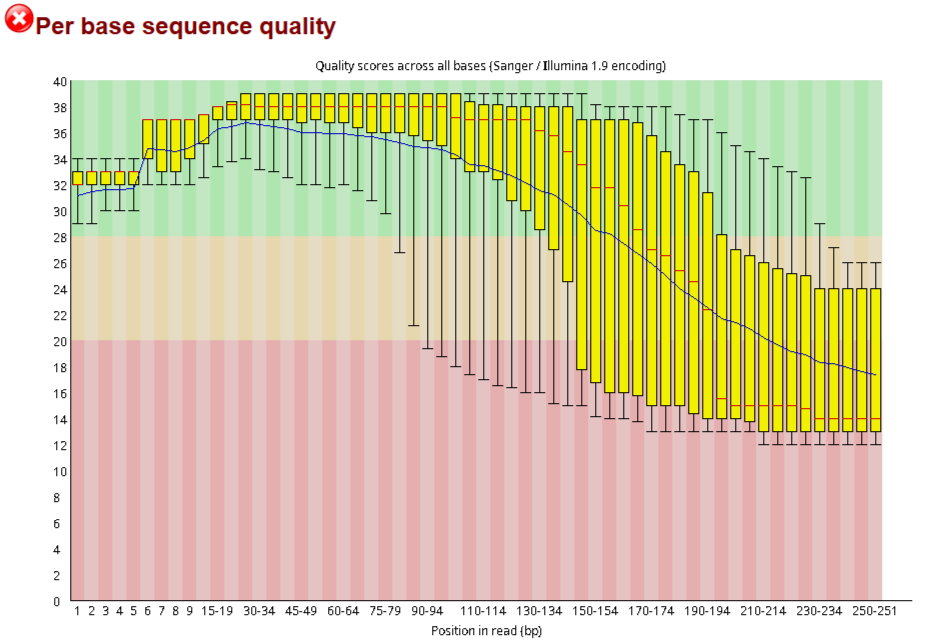

В этом файле качество прочтений гораздо хуже, позиции 130-250

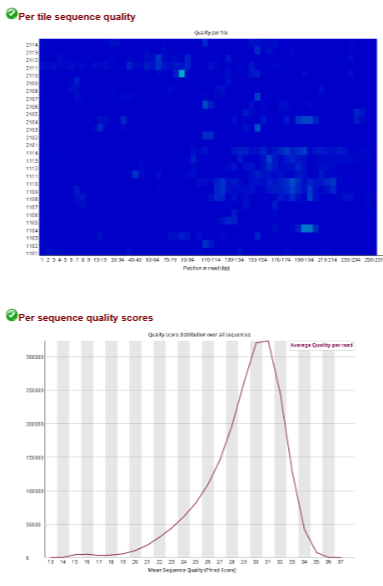

среднее значение по позициям хуже - 30

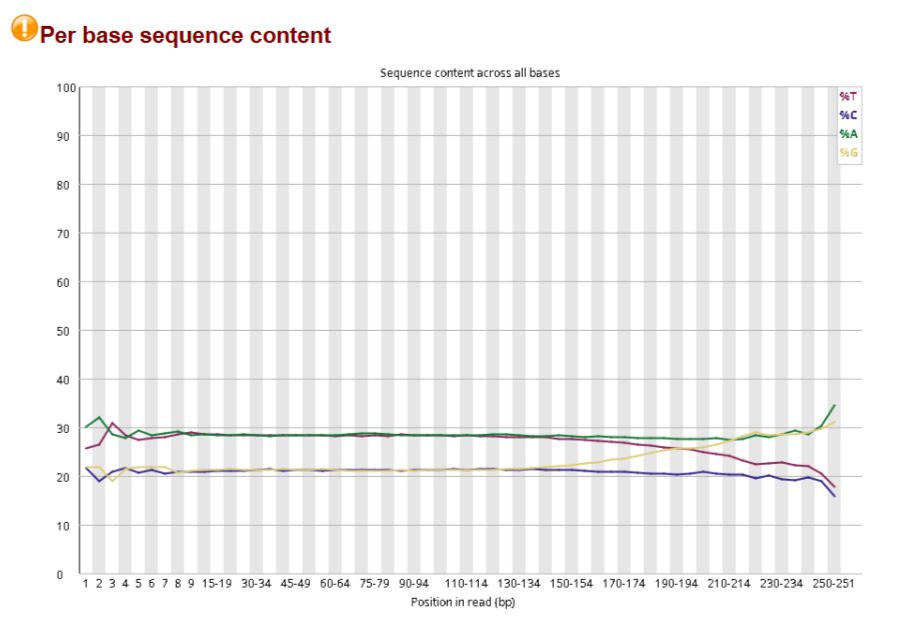

адаптеры в первых позициях и последних.

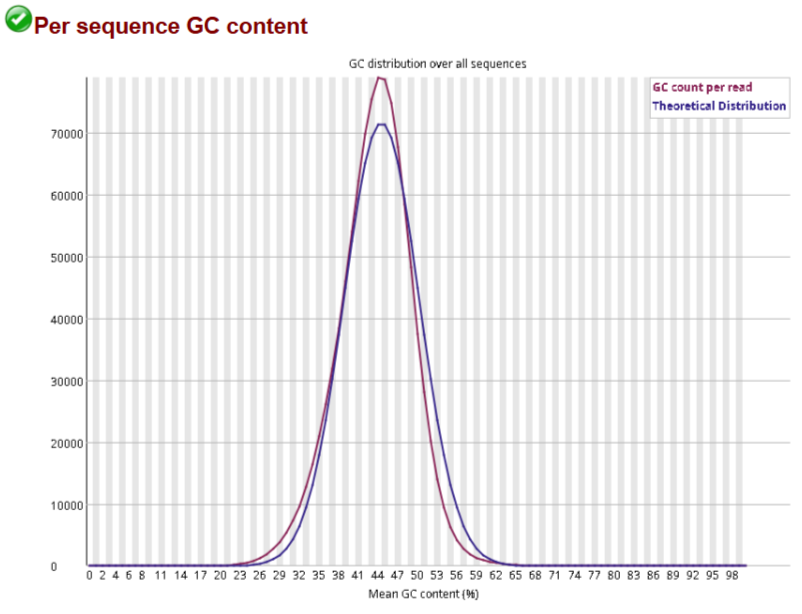

GC состав лучше, чем в первом файле, загрязнений не так много.

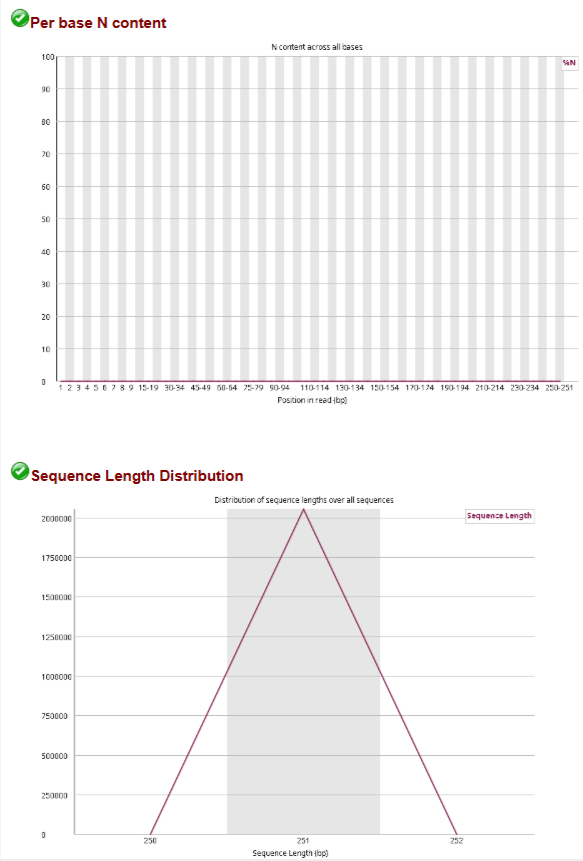

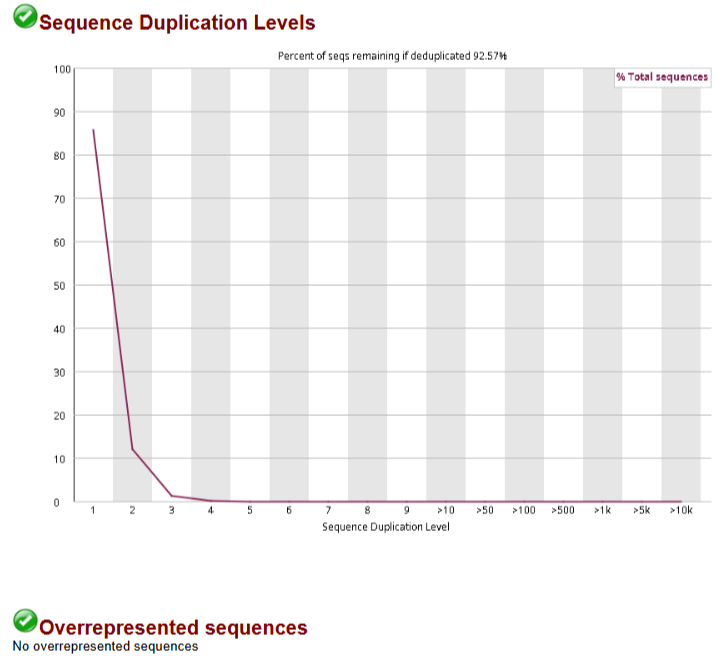

нет сверхпредставленных последовательностей

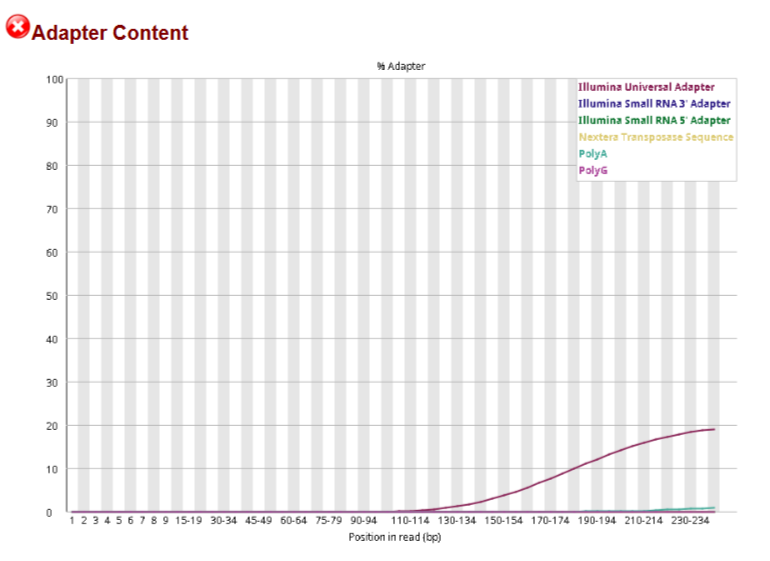

Есть адаптеры - универсальные адаптеры для иллюмины, polyA нет

Проведем тримминг:

для этого используем скрипт:

In [ ]:
#!/bin/bash
#SBATCH --job-name=trimming              # Название задачи
#SBATCH --output=trim.log                # Лог-файл стандартного вывода
#SBATCH --error=trim.err                 # Лог-файл стандартной ошибки
#SBATCH --time=00:30:00                  # Время выполнения (чч:мм:сс)
#SBATCH --cpus-per-task=4                # Количество CPU
#SBATCH --mem=4G                         # Объём памяти
#SBATCH --partition=short               # Имя очереди (уточните на вашем кластере)

# Инициализация conda
source ~/miniconda3/etc/profile.d/conda.sh
conda activate trimming

# Запуск Trimmomatic в режиме paired-end
trimmomatic PE -threads 4 \
~/homework_bioinformatics_2025/hw_10/illumina_reads_R1_001.fastq \
~/homework_bioinformatics_2025/hw_10/illumina_reads_R2_001.fastq \
output_1_paired.fastq output_1_unpaired.fastq \
output_2_paired.fastq output_2_unpaired.fastq \
ILLUMINACLIP:~/homework_bioinformatics_2025/hw_10/adapters.fa:2:30:10 \
LEADING:20 TRAILING:20 SLIDINGWINDOW:4:15 MINLEN:36

Далее снова fastqc:

In [ ]:
#!/bin/bash
#SBATCH --job-name=fastqc_multiqc       # Название задачи
#SBATCH --output=fastqc_multiqc.log     # Лог-файл
#SBATCH --error=fastqc_multiqc.err      # Файл с ошибками
#SBATCH --time=00:30:00                 # Максимальное время выполнения (30 мин)
#SBATCH --cpus-per-task=4               # 4 CPU на задачу
#SBATCH --mem=4G                        # 4 ГБ RAM
#SBATCH --partition=short            # Стандартная партиция (может отличаться в вашем кластере)

source ~/miniconda3/etc/profile.d/conda.sh
conda activate fastqc
cd ~/homework_bioinformatics_2025/hw_10
mkdir -p fastqc_results/after_trimming

fastqc ~/homework_bioinformatics_2025/hw_10/output_1_paired.fastq -o ~/homework_bioinformatics_2025/hw_10/fastqc_results/after_trimming
fastqc ~/homework_bioinformatics_2025/hw_10/output_2_paired.fastq -o ~/homework_bioinformatics_2025/hw_10/fastqc_results/after_trimming

Проанализируем полученные paired файлы:

Видим, что качество прочтений значительно лучше:

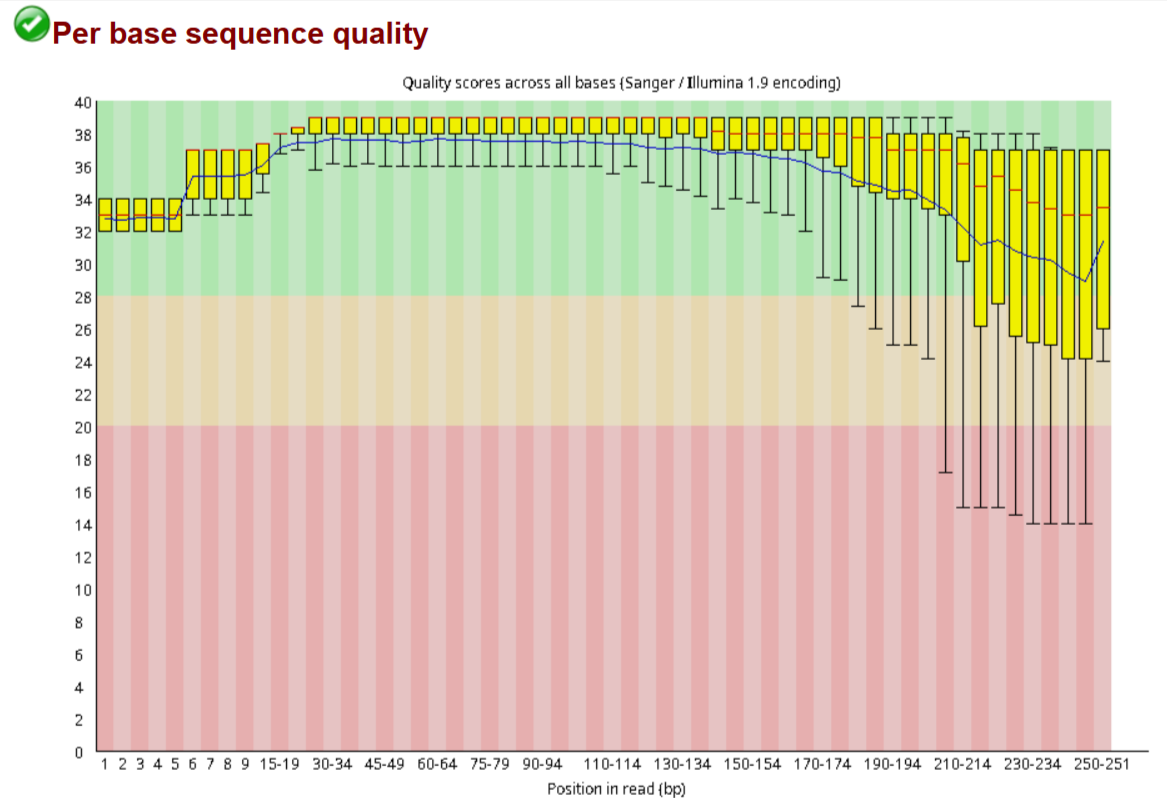

Во втором файле стало чуть лучше, но все еще плохо:

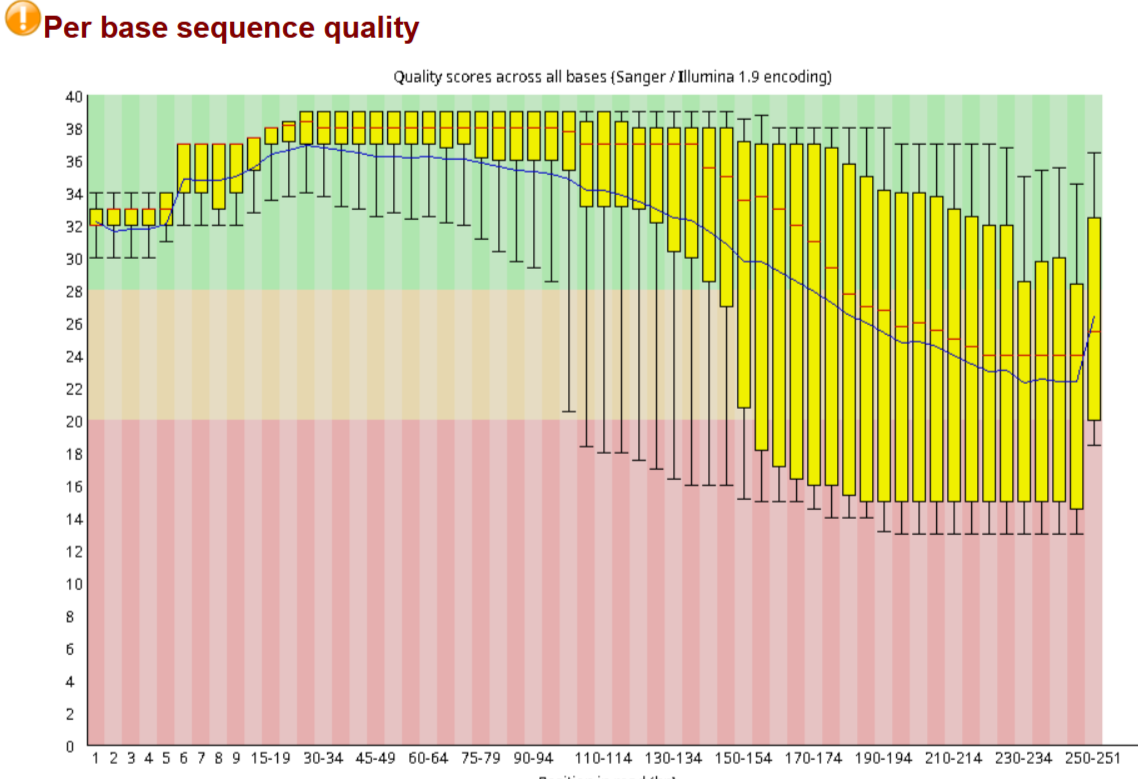

Плохими параметрами остались - содержание адаптеров:

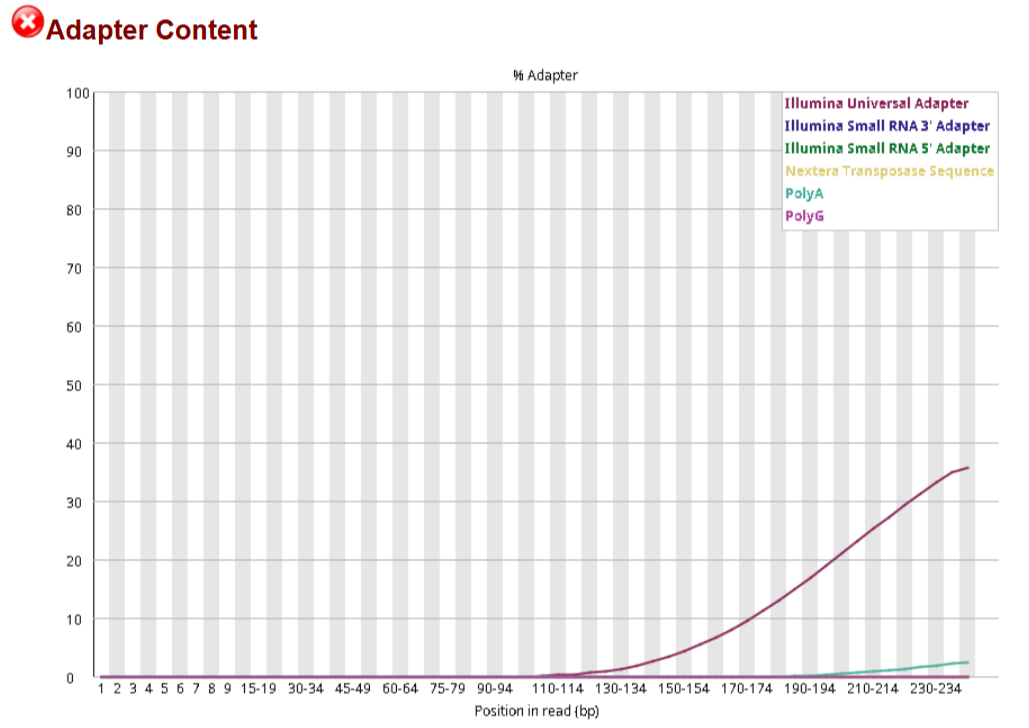

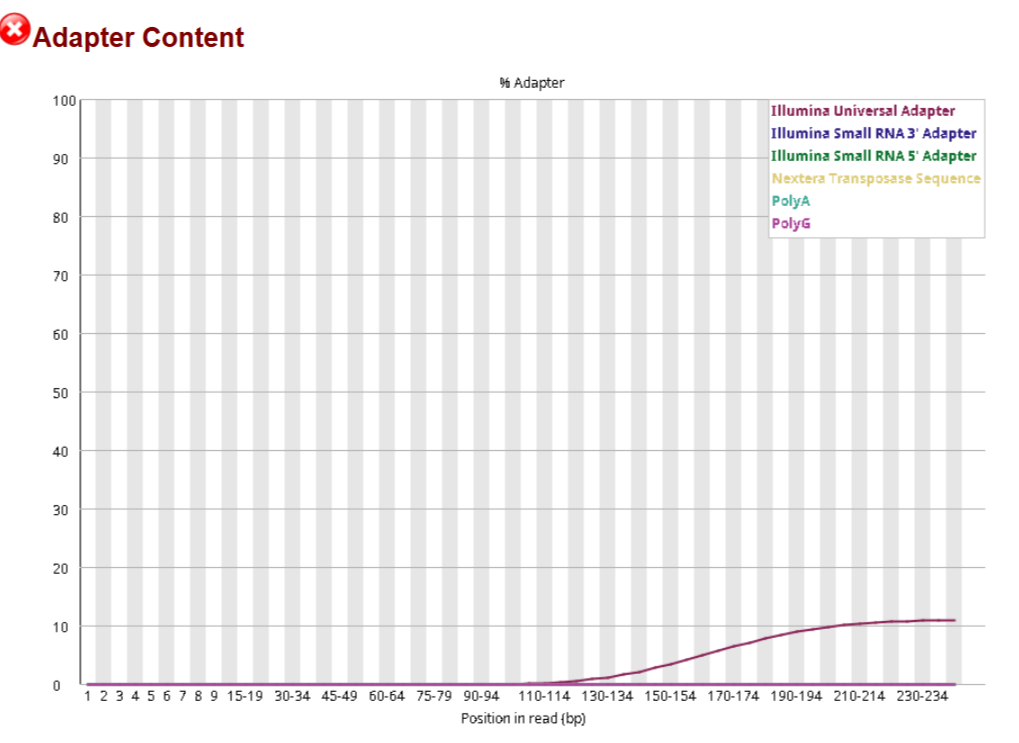

поэтому запустим код еще с изменненными параметрами illuminaclip: добавим CROP:150

После повторной обработки:

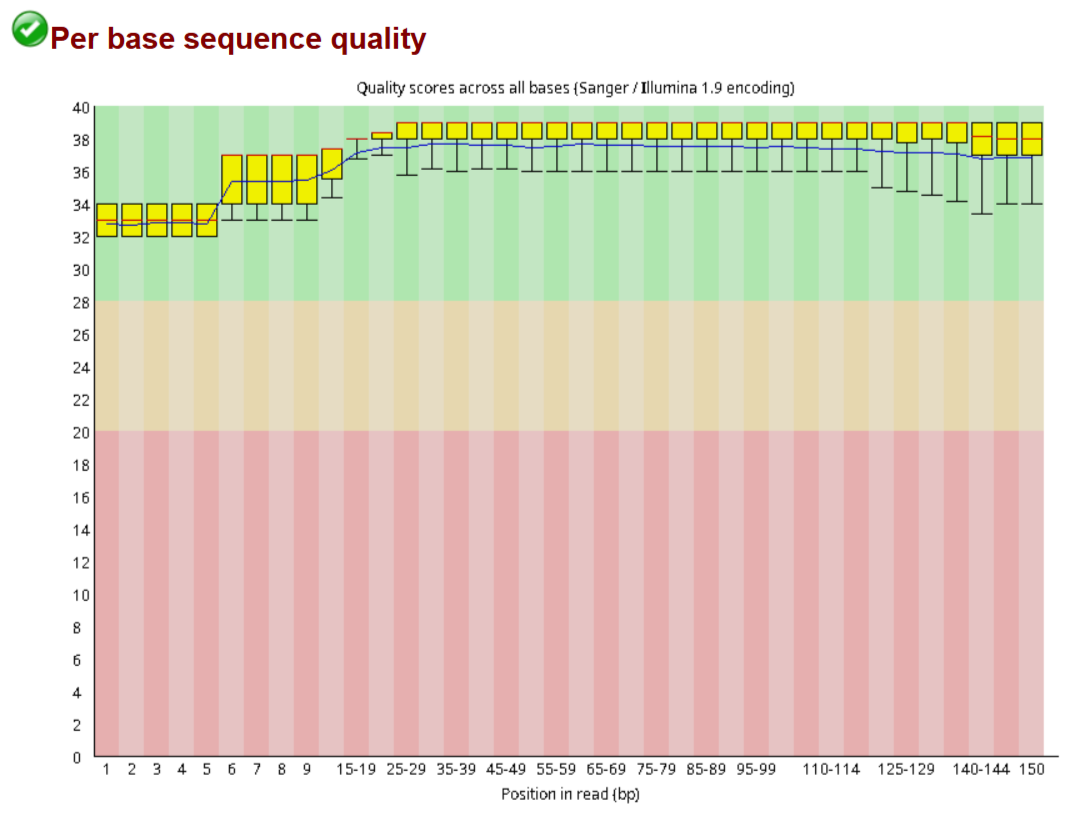

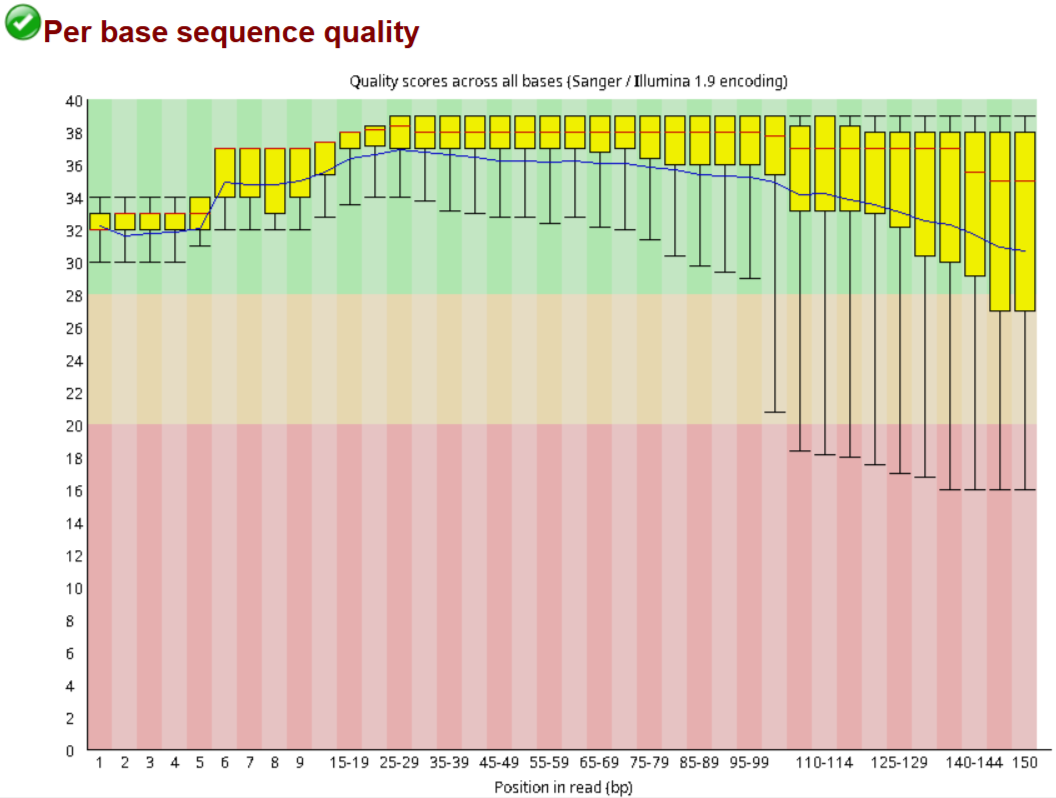

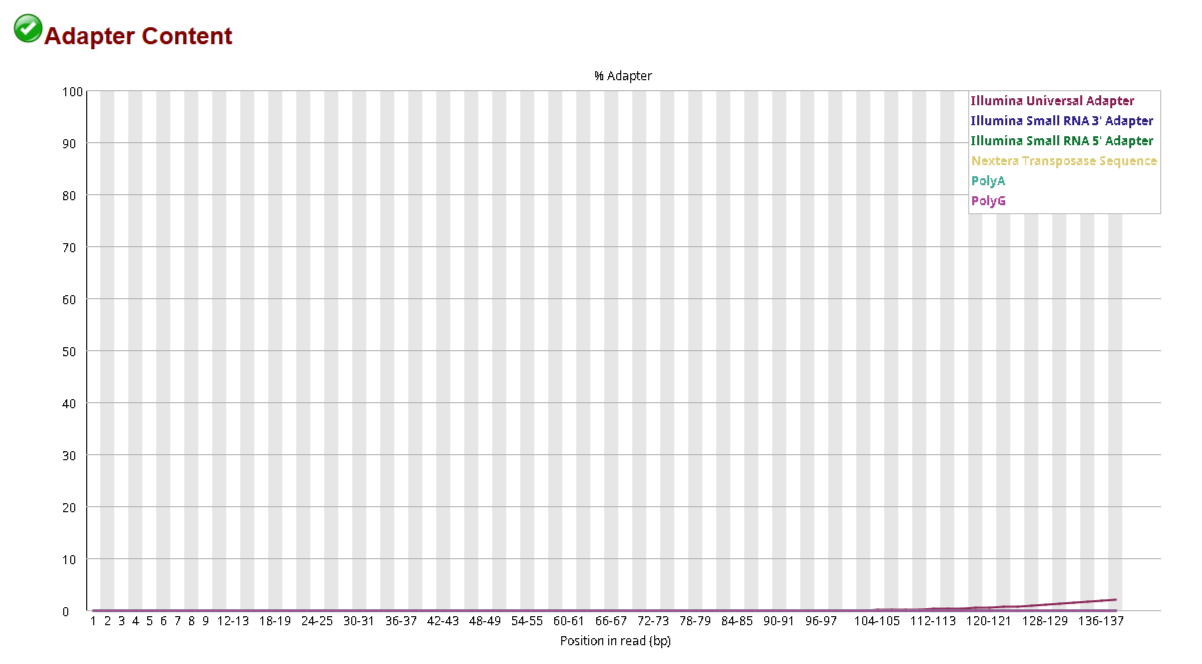

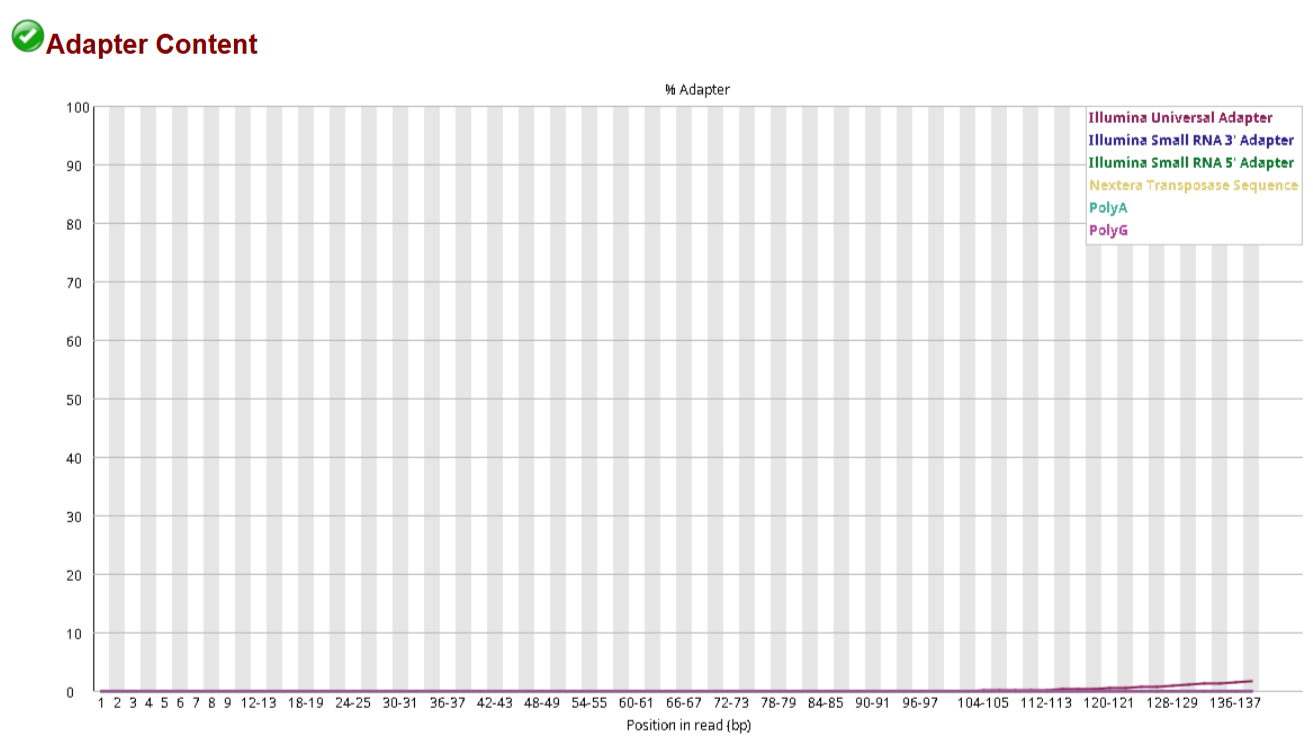